<img src="https://raw.githubusercontent.com/Tarikul-Islam-Anik/Animated-Fluent-Emojis/master/Emojis/Smilies/Enraged%20Face.png" alt="Enraged Face" width="10%" height="10%" /><img src="https://raw.githubusercontent.com/Tarikul-Islam-Anik/Animated-Fluent-Emojis/master/Emojis/Smilies/Angry%20Face.png" alt="Angry Face" width="10%" height="10%" />
<img src="https://raw.githubusercontent.com/Tarikul-Islam-Anik/Animated-Fluent-Emojis/master/Emojis/Smilies/Neutral%20Face.png" alt="Neutral Face" width="10%" height="10%" />
<img src="https://raw.githubusercontent.com/Tarikul-Islam-Anik/Animated-Fluent-Emojis/master/Emojis/Smilies/Grinning%20Face%20with%20Smiling%20Eyes.png" alt="Grinning Face with Smiling Eyes" width="10%" height="10%" />
<img src="https://raw.githubusercontent.com/Tarikul-Islam-Anik/Animated-Fluent-Emojis/master/Emojis/Smilies/Beaming%20Face%20with%20Smiling%20Eyes.png" alt="Beaming Face with Smiling Eyes" width="10%" height="10%" />
</div>

# **1- Sentiment Analysis**

Sentiment analysis is a natural language processing (NLP) task that involves determining the emotional tone or sentiment expressed in a piece of text. It is widely used in various applications, such as analyzing customer reviews, monitoring social media opinions, and gauging public sentiment on different topics. In this project, I am developing a text classification system to perform sentiment analysis on tweets. The dataset, sourced from Kaggle, consists of tweets labeled as **positive, negative, or neutral**, allowing for a multi-class classification approach. By analyzing the patterns in textual data, the goal is to build an effective model that can accurately predict the sentiment of unseen tweets.  

To achieve this, I am comparing two different approaches: **traditional machine learning models** and **deep learning models**. In the traditional machine learning category, I am using **Logistic Regression and Support Vector Machines (SVM)**, both of which are widely used for text classification tasks due to their effectiveness in handling high-dimensional data. On the deep learning side, I am implementing a **Long Short-Term Memory (LSTM) network** with **Word2Vec embeddings** to capture the sequential nature of text and understand contextual relationships between words. By evaluating the performance of these models, I aim to determine which approach is more effective for sentiment analysis on tweets.

In [1]:
# import Libraries

import re
import string
import numpy as np
import pandas as pd
import gensim
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#import NLTK Resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **2- Load and Explore Twitter Dataset**

In [3]:
#install opendatasets
!pip install opendatasets

In [4]:
#import the dataset from Kaggle
import opendatasets as od
od.download('https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis/data?select=sentiment_analysis.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mayasino
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis


100%|██████████| 14.3k/14.3k [00:00<00:00, 5.23MB/s]

In [5]:
# Read dataset
data = pd.read_csv('/content/sentiment-analysis/sentiment_analysis.csv')

In [6]:
#see the complete data
data.head(11)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
5,2016,11,22,night,"Its night 2 am, feeling neutral",neutral,Facebook
6,2017,12,28,morning,2 am feedings for the baby are fun when he is ...,positive,Facebook
7,2017,12,28,noon,Soooo high,neutral,Instagram
8,2019,10,28,night,Both of you,neutral,Twitter
9,2018,5,28,morning,Today first time I arrive in the boat. Its ama...,positive,Facebook


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Day'].plot(kind='hist', bins=20, title='Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Time of Tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Year', y='Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Month', y='Day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time of Tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time of Tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Platform')):
  _plot_series(series, series_name, i)
  fig.legend(title='Platform', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time of Tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time of Tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Day')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Day'].plot(kind='line', figsize=(8, 4), title='Day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sentiment'].value_counts()
    for x_label, grp in _df_18.groupby('Time of Tweet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time of Tweet')
_ = plt.ylabel('sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Platform'].value_counts()
    for x_label, grp in _df_19.groupby('sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sentiment')
_ = plt.ylabel('Platform')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Time of Tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='Time of Tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Platform'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='Platform', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Time of Tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Year', y='Time of Tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
#see data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [8]:
#see data columns
data.columns

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')

In [9]:
# Filter for positive sentiments.
all_positive_tweets = data[data['sentiment'] == 'positive']['text'].tolist()

# Calculate and display the length.
len(all_positive_tweets)

166

In [10]:
# Filter for negative sentiments.
all_negative_tweets = data[data['sentiment'] == 'negative']['text'].tolist()

# Calculate and display the length.
len(all_negative_tweets)

134

In [11]:
# Filter for neutral sentiments.
all_neutral_tweets = data[data['sentiment'] == 'neutral']['text'].tolist()

# Calculate and display the length.
len(all_neutral_tweets)

199

In [12]:
tweet = all_neutral_tweets[110]
tweet

'going to shower because i don`t want to smell at school tomorrow'

# **3- Preprocessing, Exploratory Data Analysis and Handle Missing Data**

In [13]:
#Show Statistics
print(data['text'].value_counts())
print(data['sentiment'].str.len().describe())

text
Grabbing coffee from  then making mom breakfast                                                                             4
im thinking that im going to have fun tonight....and maybe some changes are coming                                          3
 Haha I know, I cant handle the fame!  and thank you!                                                                       3
 thanks. before the major chop.                                                                                             2
 yeah I was thinking about that ,ahaha                                                                                      2
                                                                                                                           ..
  why not now you made me sad I thought you`d be jumping for joy                                                            1
tonight in party w/ my girls (minus vita)                                                                        

**Check for missing values**

In [14]:
#Any Missing Values
print(data.isnull().sum())

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64


In [15]:
# Checking for missing values

data.isnull().values.any()

False

<ipython-input-16-207d76134086>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette="pastel")


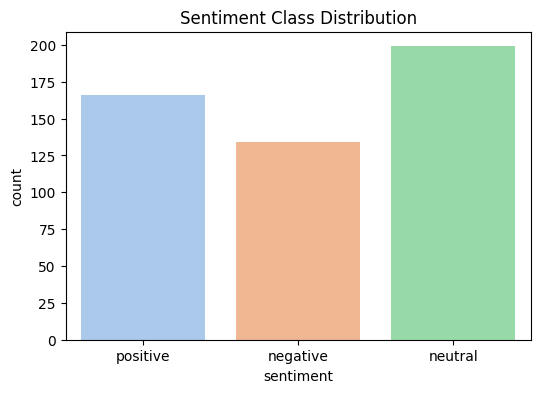

In [16]:
# Drop missing values if any
data.dropna(inplace=True)

# Drop missing values if any
data.dropna(inplace=True)

# Data distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data, palette="pastel")
plt.title("Sentiment Class Distribution")
plt.show()

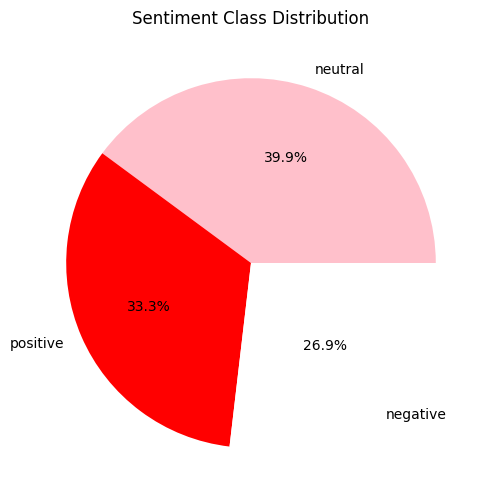

In [17]:
# Pie chart for sentiment distribution
plt.figure(figsize=(6, 6))
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'red', 'white'])
plt.title("Sentiment Class Distribution")
plt.ylabel("")
plt.show()

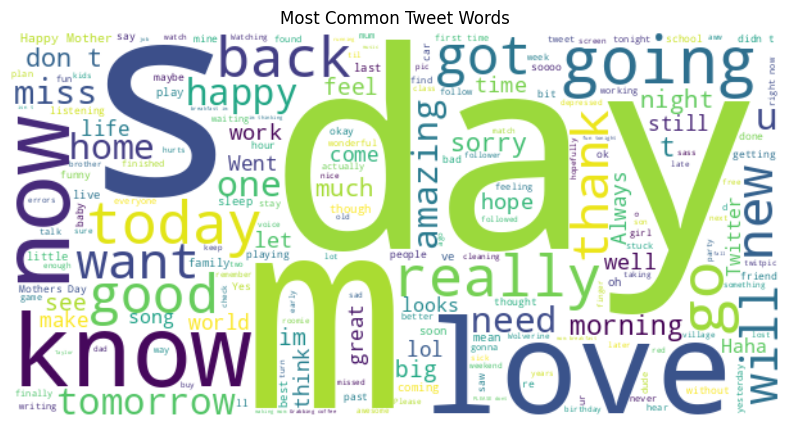

In [18]:
#Visualising the most common words
texts = ' '.join(data['text'].dropna().astype(str))
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Tweet Words')
plt.show()

In [19]:
# More data cleaning

# All_negative_tweets, all_positive_tweets, and all_neutral_tweets contain the respective tweets
negative = all_negative_tweets
positive = all_positive_tweets
neutral = all_neutral_tweets

def text_process(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'@[\w]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer()
    tweet_tokenized = tokenizer.tokenize(tweet)
    stopwords_english = stopwords.words('english')
    stemmer = PorterStemmer()

    pron = ['i', 'you','he','she','it','we','they']
    tweet_processed = []
    for word in tweet_tokenized:
      if word not in stopwords_english and word not in string.punctuation:
        word = word.lower()
        if word in pron: continue
        tweet_processed.append(stemmer.stem(word))

    return tweet_processed

# Process and print results for each sentiment type
print("Negative Tweet:", negative[11])
print("Processed Negative Tweet:", text_process(negative[11]))

print("\nPositive Tweet:", positive[23])
print("Processed Positive Tweet:", text_process(positive[23]))

print("\nNeutral Tweet:", neutral[69])
print("Processed Neutral Tweet:", text_process(neutral[69]))

Negative Tweet: Born and raised in NYC and living in Texas for the past 10 years!  I still miss NY
Processed Negative Tweet: ['born', 'rais', 'nyc', 'live', 'texa', 'past', '10', 'year', 'still', 'miss', 'ny']

Positive Tweet: I feel sorry, I miss you here in the sea beach
Processed Positive Tweet: ['feel', 'sorri', 'miss', 'sea', 'beach']

Neutral Tweet: just got home from work
Processed Neutral Tweet: ['got', 'home', 'work']


# **4- ML Traditional Model Implementation**

In this section, I am implementing Logistic Regression (LR) and Support Vector Machines (SVM) for sentiment analysis on tweets. Traditional ML models rely on manually extracted features and are often effective when combined with text preprocessing techniques such as tokenization, stopword removal, and TF-IDF vectorization. These models are computationally efficient and perform well on small to medium-sized datasets, making them a strong baseline for text classification tasks.

Logistic Regression is a simple yet powerful classification algorithm that models the probability of a tweet belonging to one of the sentiment classes (positive, negative, or neutral).

SVM, on the other hand, finds an optimal hyperplane that best separates the sentiment classes in a high-dimensional space. By using kernel functions, SVM can handle non-linearly separable data as well. The models will be trained on TF-IDF-transformed text data, and their performance will be evaluated using metrics such as accuracy, precision, recall, and F1-score to compare their effectiveness in sentiment classification.

In [20]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': 2})

In [21]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,1,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",1,Facebook
2,2017,8,18,night,Don't angry me,2,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,2,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",2,Instagram


In [22]:
# converting the cleaned data into TF-IDF

vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X = vectorizer.fit_transform(data["text"])

# Convert to dense format
X = X.toarray()

In [23]:
# Extract the target value
y = data["sentiment"]

# **4A- Logistic Regression (LR)**

In [24]:
# Split Data into Training & Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix, classification_report
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities for all classes
y_prob = model.predict_proba(X_test)  # Get probabilities for all classes

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (Positive Predictive Value) - Changed to 'weighted' average
precision = precision_score(y_test, y_pred, average='weighted')

# Recall (Sensitivity, True Positive Rate) - Changed to 'weighted' average
recall = recall_score(y_test, y_pred, average='weighted')

# F1 Score (Harmonic mean of Precision and Recall) - Changed to 'weighted' average
f1 = f1_score(y_test, y_pred, average='weighted')

# Log Loss (Better for probability-based models)
logloss = log_loss(y_test, y_prob)  # Now using probabilities for all classes

# ROC AUC Score (Measures model’s ability to distinguish between classes)
# For multiclass, 'ovr' (one-vs-rest) is used
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", class_report)

Accuracy: 0.6100
Precision: 0.7431
Recall: 0.6100
F1 Score: 0.6047
Log Loss: 0.9138
ROC AUC Score: 0.8460

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.93      0.61        30
           1       0.87      0.59      0.70        34
           2       0.87      0.36      0.51        36

    accuracy                           0.61       100
   macro avg       0.73      0.63      0.61       100
weighted avg       0.74      0.61      0.60       100



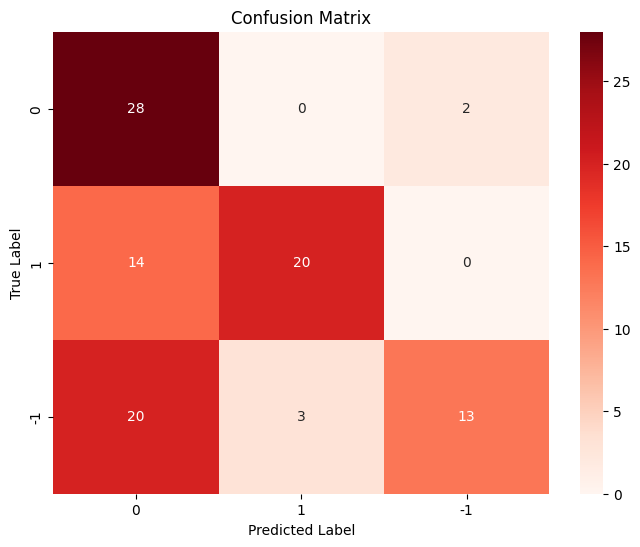

In [27]:
# Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1, -1], yticklabels=[0,1, -1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **4B- Support Vector Machines (SVM)**

In [28]:
# SVM
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
classifier = SVC(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        24
           1       1.00      0.60      0.75        15
           2       1.00      0.27      0.43        11

    accuracy                           0.72        50
   macro avg       0.88      0.62      0.65        50
weighted avg       0.82      0.72      0.69        50



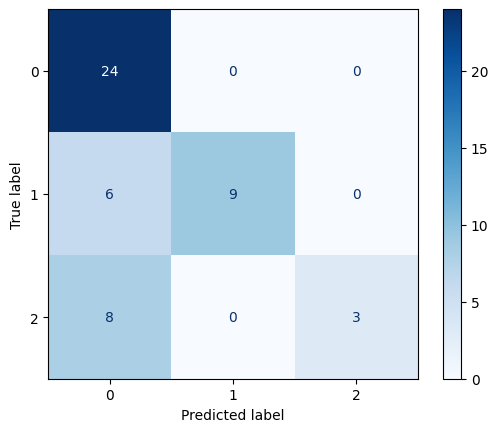

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
matrix = confusion_matrix(y_test, y_pred)
#color
disp = ConfusionMatrixDisplay(matrix)
disp.plot(cmap="Blues")

print(classification_report(y_test, y_pred))

In [30]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# metrics
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average="macro")  # Use precision_recall_fscore_support
print("Precision    :", format(precision))
print("Recall       :", format(recall))
print("F-Score      :", format(fscore))
print("Accuracy     :", accuracy_score(y_test, y_pred))

Precision    : 0.8771929824561404
Recall       : 0.6242424242424243
F-Score      : 0.6509216589861752
Accuracy     : 0.72


# **5- Deep Learning Model Training**

The following code is performing sentiment analysis on tweets using deep learning with Word2Vec embeddings. Here’s what it does step by step:  

- **Prepares the text**: Cleans and processes the tweets.  
- **Trains a Word2Vec model**: Learns word embeddings from the processed tweets.  
- **Tokenizes the text**: Converts words into numbers so the model can understand them.  
- **Pads sequences**: Ensures all tweet inputs have the same length.  
- **Creates an embedding matrix**: Maps words to their Word2Vec vector representations.  
- **Splits the data**: Divides it into training and testing sets.  
- **Computes class weights**: Balances the model training if some sentiments appear more than others.  
- **Builds a deep learning model**: Uses a bidirectional LSTM (a type of neural network that understands sequences).  
- **Uses pre-trained embeddings**: Loads Word2Vec embeddings into the model.  
- **Compiles the model**: Chooses an optimizer and loss function for training.  
- **Trains the model**: Learns from the data while using early stopping to avoid overfitting.  
- **Evaluates the model**: Checks how well it performs on test data.  
- **Visualizes results**: Plots accuracy, loss, and a confusion matrix to understand model performance.  
- **Save Model:** Finally it saves the model.

In [34]:
# preprocessing, tokenizing, training and evaluating the Deep Learning model using Word2vec embedding

# Ensure TensorFlow doesn't allow NaN values
tf.keras.backend.set_floatx('float32')

#  Preprocess Text
def preprocess_text(text):
    if isinstance(text, str):
        return text_process(text)  # Your existing text cleaning function
    return ""

data['processed_text'] = data['text'].apply(preprocess_text)

#  Train Word2Vec Model
sentences = data['processed_text'].tolist()
word2vec_model = Word2Vec(sentences=sentences, vector_size=200, window=5, min_count=2, workers=4)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

#  Padding Sequences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

#  Create Embedding Matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 200  # Increased embedding size
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Fix NaN Values in Embedding Matrix
embedding_matrix = np.nan_to_num(embedding_matrix)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['sentiment'], test_size=0.2, random_state=42)

#  Ensure Labels are Integers
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

#  Compute Class Weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [36]:
# Define Model
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_length,
              trainable=True),  # Fine-tuning Word2Vec embeddings
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01))),
    Dropout(0.5),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Force model to build by specifying input shape
model.build(input_shape=(None, max_length))  # Fixes unknown output shapes

#  Optimizer with Lower Learning Rate & Gradient Clipping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003, clipnorm=1.0)

#  Compile Model with Class Weights
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#  Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Summary
model.summary()  # Now shows proper output shapes

# Train Model
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=64,
                    validation_split=0.1,
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping],
                    verbose=1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 20, 200)             │         245,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_3                  │ (None, 20, 200)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 20, 512)             │         935,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,854,163 (7.07 MB)

 Trainable params: 1,854,163 (7.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 569ms/step - accuracy: 0.3763 - loss: 8.6909 - val_accuracy: 0.4250 - val_loss: 8.2740
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 485ms/step - accuracy: 0.4319 - loss: 8.1593 - val_accuracy: 0.4250 - val_loss: 7.7607
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 413ms/step - accuracy: 0.4493 - loss: 7.6421 - val_accuracy: 0.4250 - val_loss: 7.2769
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.4322 - loss: 7.1741 - val_accuracy: 0.4250 - val_loss: 6.8258
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 523ms/step - accuracy: 0.5175 - loss: 6.7216 - val_accuracy: 0.5750 - val_loss: 6.4041
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step - accuracy: 0.5557 - loss: 6.3137 - val_accuracy: 0.5250 - val_loss: 6.0091
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.5740 - loss: 5.9111 - val_accuracy: 0.6000 - val_loss: 5.6341
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.6828 - loss: 5.5272 - val_accuracy: 0.5500 - val_loss

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        30
           1       0.78      0.53      0.63        34
           2       0.63      0.72      0.68        36

    accuracy                           0.65       100
   macro avg       0.67      0.65      0.65       100
weighted avg       0.67      0.65      0.65       100



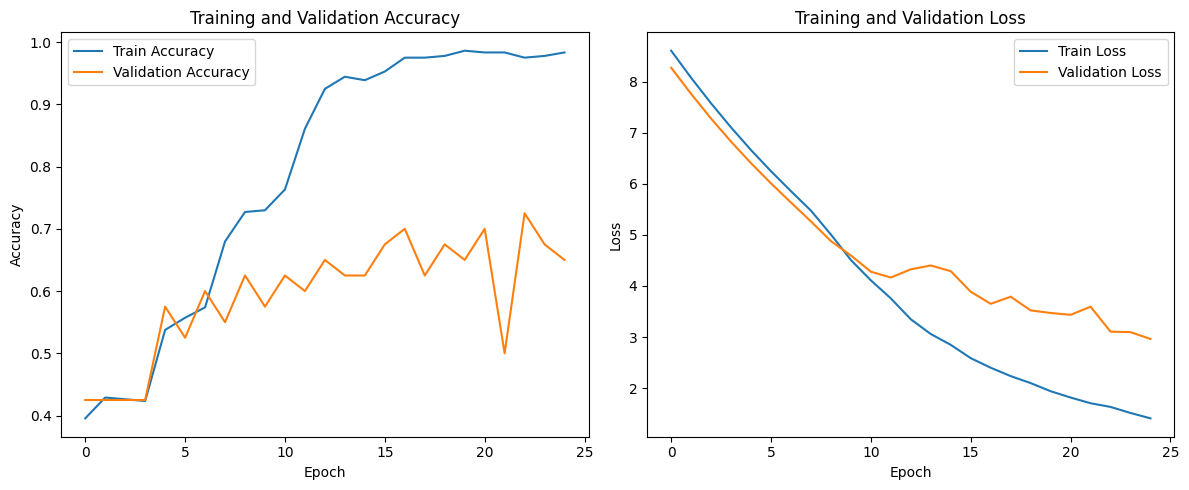

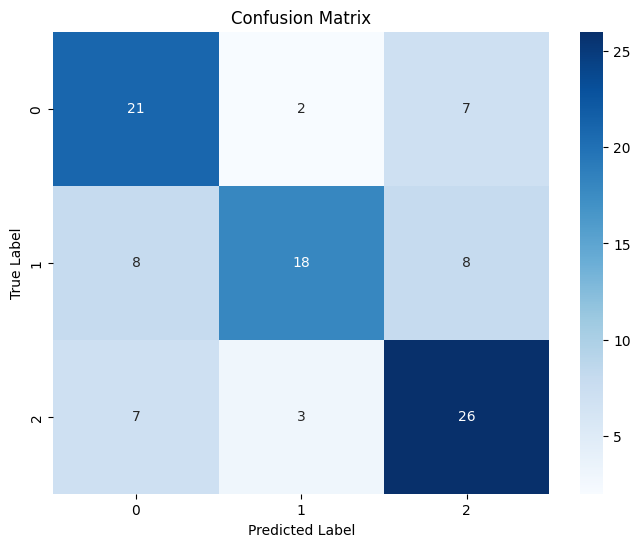

In [37]:

# Evaluate Model
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

# === Plot Training Performance ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
class_names = sorted(data['sentiment'].unique())  # Adjust based on your class labels

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
#save the model
model.save("model.keras")